In [120]:
import pandas as pd
import altair as alt
from IPython.display import Image


У додатку ви знайдете файл, котрий містить дані та зображення - візуалізацію на основі цих даних

Ваша задача

- Ідентифікувати та описати проблеми у цій візуалізації даних (я очікую від вас текст)

- Зробити альтернативний варіант презентації цих даних (я очікую від вас візуалізацію та пояснення, чому вона працює ліпше, ніж оригінальна)


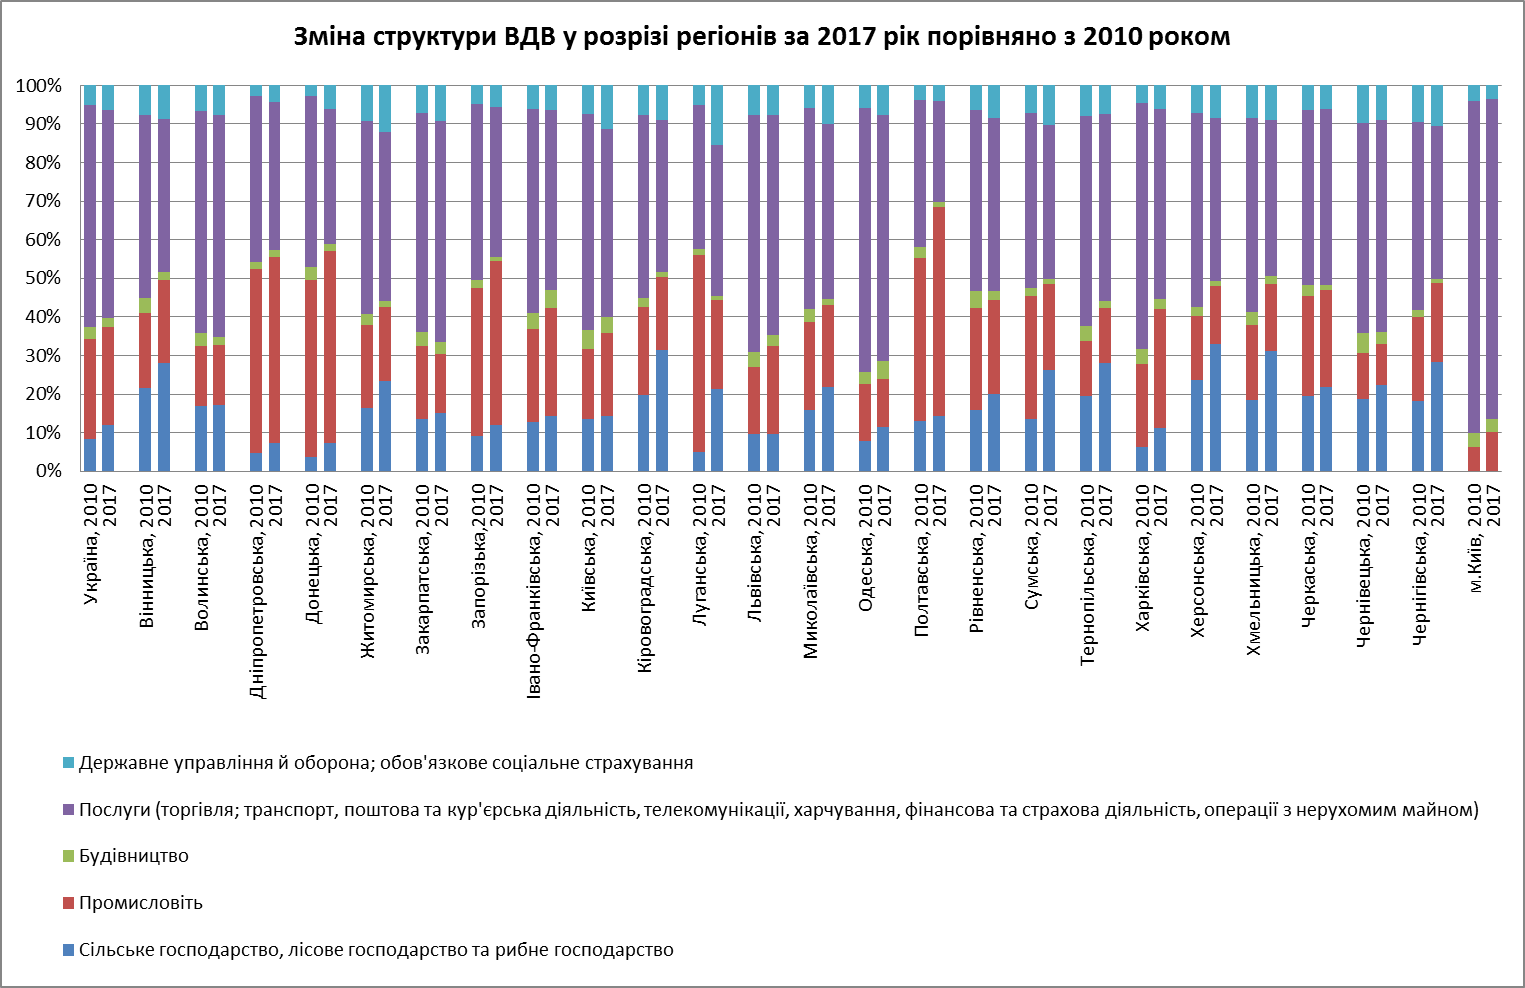

In [121]:
Image(filename='./data/1.png')


### Ідентифікувати та описати проблеми у цій візуалізації даних (я очікую від вас текст)

- текст написаний вертикально (axis X) ergo тяжко читати
- в легенді категорія "Послуги" забагато тектсу
- повторення 2010 і 2017 постійно для кожної області, що робить графік месс
- по axis Y значення не сильно репрезентативні, бо і так ясно що 100 % це максимум
- категорії для різних областей починаються в різних місцях і тому тяжко відслідкувати, де більше а де менше, тому треба вибрати інший тип візуалізації 

### Зробити альтернативний варіант презентації цих даних (я очікую від вас візуалізацію та пояснення, чому вона працює ліпше, ніж оригінальна)

In [122]:
df = pd.read_excel("./data/1.4_02.xlsx")
df.head()


,"Регіон, рік",сільське господарство,промисловість,будівництво,послуги,державне управління
0,"Україна, 2010",8.3,25.9,3.3,57.3,5.2
1,"Україна, 2017",12.1,25.2,2.5,53.7,6.5
2,"Вінницька, 2010",21.6,19.3,4.1,47.4,7.6
3,"Вінницька, 2017",28.1,21.4,2.0,39.8,8.7
4,"Волинська, 2010",16.9,15.6,3.2,57.7,6.6


In [123]:
df[['регіон', 'рік']] = df['Регіон, рік'].str.split(',', 1, expand=True)
df = df.astype({"рік": int})
df = df.drop(["Регіон, рік"], axis=1)
df.head()


,сільське господарство,промисловість,будівництво,послуги,державне управління,регіон,рік
0,8.3,25.9,3.3,57.3,5.2,Україна,2010
1,12.1,25.2,2.5,53.7,6.5,Україна,2017
2,21.6,19.3,4.1,47.4,7.6,Вінницька,2010
3,28.1,21.4,2.0,39.8,8.7,Вінницька,2017
4,16.9,15.6,3.2,57.7,6.6,Волинська,2010


In [124]:
df_categories = pd.DataFrame(columns=["category", "value", "region", "year"])

categories = list(df.columns[:5])
for index, row in df.iterrows():
    for cat in categories:
        df_categories.loc[len(df_categories.index)] = [
            cat, row[cat] / 100, row['регіон'], row['рік']]

df_categories.head(15)


,category,value,region,year
0,сільське господарство,0.083,Україна,2010
1,промисловість,0.259,Україна,2010
2,будівництво,0.033,Україна,2010
3,послуги,0.573,Україна,2010
4,державне управління,0.052,Україна,2010
5,сільське господарство,0.121,Україна,2017
6,промисловість,0.252,Україна,2017
7,будівництво,0.025,Україна,2017
8,послуги,0.537,Україна,2017
9,державне управління,0.065,Україна,2017


In [125]:
input_radio = alt.binding_radio(options=df_categories.year.unique())
selected_year = alt.selection_single(
    fields=['year'],
    bind=input_radio,
    name='Select',
    empty='all',
    init={'year': 2010}
)


In [126]:
bars = alt.Chart(df_categories).mark_bar().encode(
    x=alt.X('value:Q', stack='zero'),
    y=alt.Y('region:N'),
    color=alt.Color('category')
)

text = alt.Chart(df_categories).mark_text(dx=-15, dy=3, color='white').encode(
    x=alt.X('value:Q', stack='zero', axis=None),
    y=alt.Y('region:N'),
    detail='category:N',
    text=alt.Text('value:Q', format='.0%')
)

(bars + text).add_selection(
    selected_year
).transform_filter(selected_year).properties(height=500, width=1000).configure_view(strokeWidth=0)


alt.LayerChart(...)

- Текст знаходиться горизонтально, тобто його легко читати
- відсотки позначають скільки по факту якась категорія займає, тобто можна порівнюватии з іншими областями
- можна інтерактивно переключатись між роками, отже не так багато всього на одному графіку, трохи легше розбиратись